<a href="https://colab.research.google.com/github/varshiniece/Technohacks-Internship-tasks/blob/main/creditcard_fraud_detection_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
##Credit card fraud detection Task 2 .Dataset downlladed from kaggle 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
 
 
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [4]:
df.shape

(284807, 31)

In [5]:
#EXPLORATORY DATA ANALYSIS.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#Time - Contains the seconds elapsed between each transaction;
#Amount - Total transactioned value;
#Class - Label given from transactions, where 0 represent a normal transaction and 1 reffers to a fraudulent transaction
#V! through V28: personal data of customers (ananimized)

In [8]:
#To check null values

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values

0    284315
1       492
Name: Class, dtype: int64


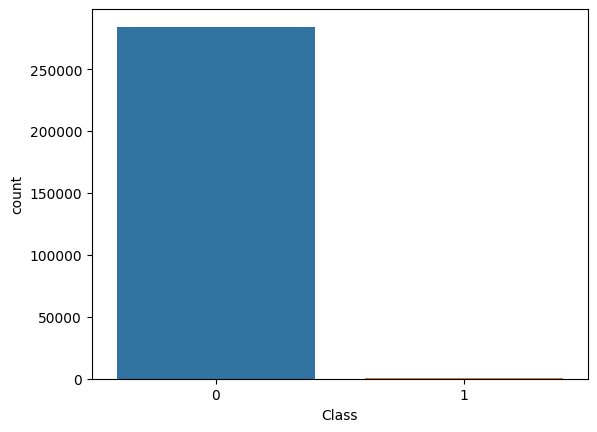

In [12]:
sns.countplot(x='Class',data=df);
print(pd.Series(df.Class).value_counts())
plt.show()


the count plot shows the data is highly imbalanced as there are more legal transactions than fraudalent tractions.
this has to be balanced to impliment ML algorithms

Checking Outliers in ‘Amount’ values:



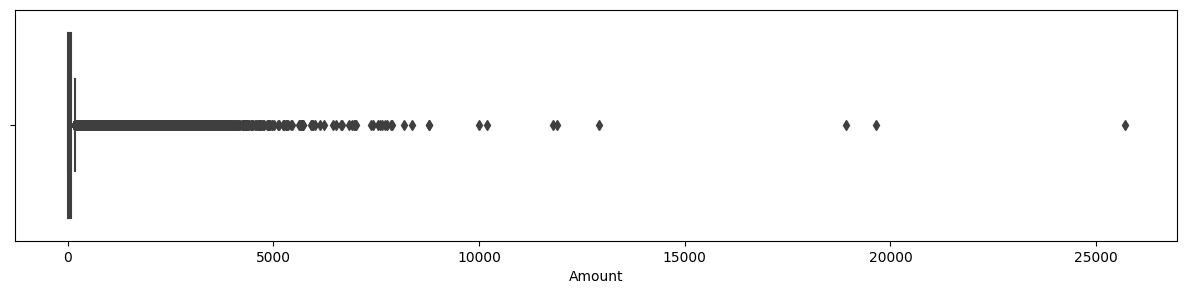

In [16]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='Amount', data=df)
plt.show()


As we can see in the previous image, there’s a lot of outliers in the Amount column, we will perform a cleaning of these values and redo the plot to check how it goes.



In [17]:
# checking outlier values 
q1_amount = df.Amount.quantile(.25)
q3_amount = df.Amount.quantile(.75)
IQR_amount = q3_amount - q1_amount
print('IQR: ', IQR_amount)
# defining limits                                       
sup_amount = q3_amount + 1.5 * IQR_amount
inf_amount = q1_amount - 1.5 * IQR_amount
print('Upper limit: ', sup_amount)
print('Lower limit: ', inf_amount)


IQR:  71.565
Upper limit:  184.5125
Lower limit:  -101.7475


Lets clean the outliers and redo the boxplot

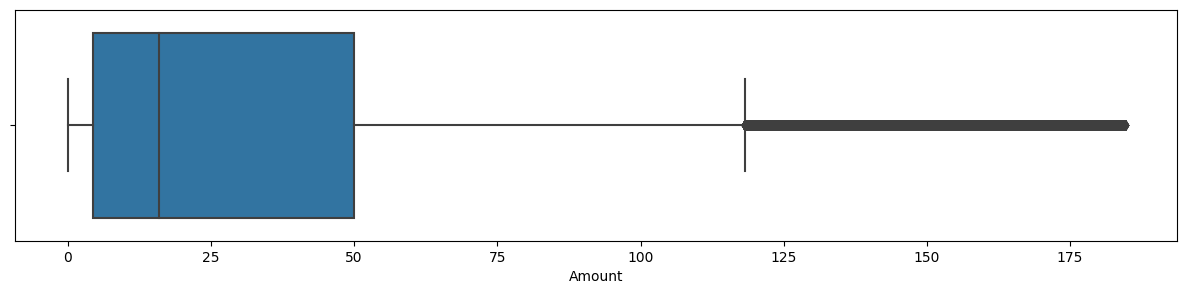

In [19]:
# cleaning the outliers in `Amount` values
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.Amount>184.513].index, axis=0, inplace=True)
# new boxplot for `Amount` values
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='Amount', data=df_clean)
plt.show()


In [20]:
#Outliers are removed and the values in amount coljmn are less discrepant and box plot is easily readable.

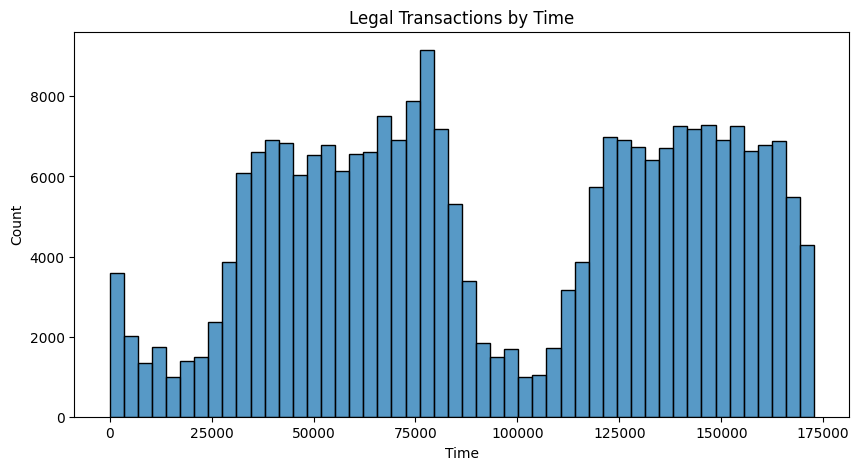

In [21]:
#Transactions Histograms
# legal transactions by time
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df_clean.Time[df_clean.Class==0]), bins=50);
ax.set_title('Legal Transactions by Time')
plt.show()




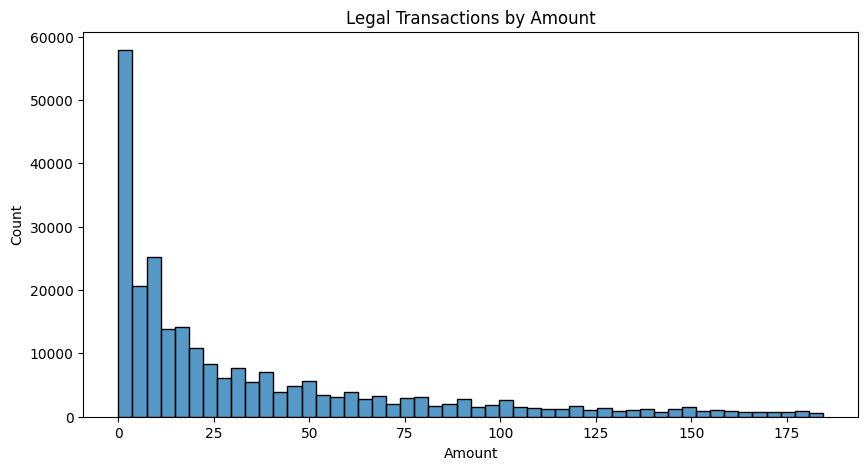

In [22]:
# legal transactions by amount
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df_clean.Amount[df_clean.Class==0]), bins=50)
ax.set_title('Legal Transactions by Amount')
plt.show()


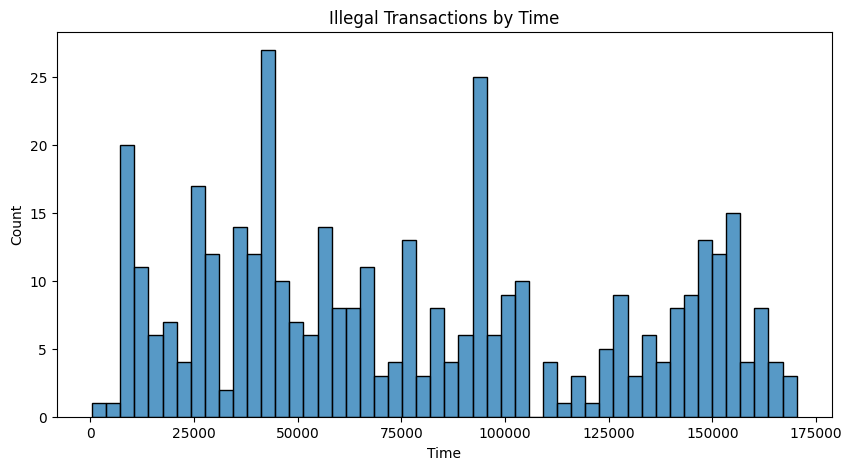

In [23]:
# illegal transactions by time
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df_clean.Time[df_clean.Class==1]), bins=50)
ax.set_title('Illegal Transactions by Time')
plt.show()


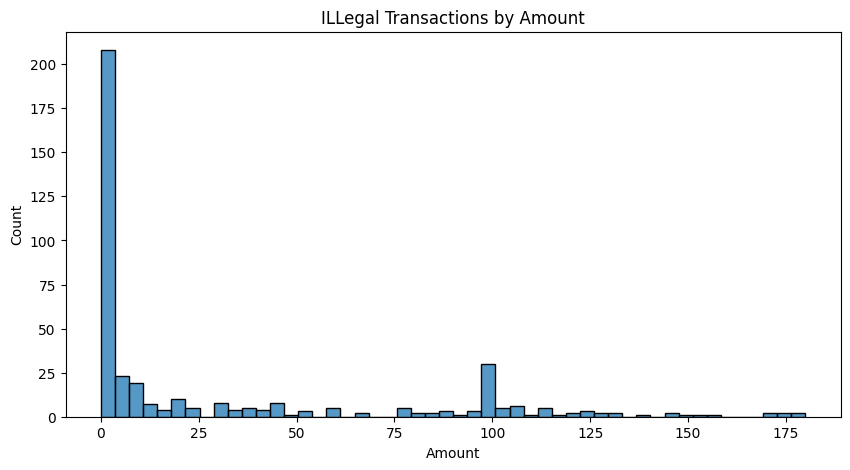

In [25]:
#Illegal transactions by Amount
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df_clean.Amount[df_clean.Class==1]), bins=50)
ax.set_title('ILLegal Transactions by Amount')
plt.show()


DATA **PREPROCESING**

Before we create the machine learning model, we will need to make some adjustments to the dataset values. The steps are listed below:

Standardize the Time and Amount values;

Divide the dataset into train and test;

Balance the values.


In [28]:
# importing scikit-learn modules
#import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler


STANDARDISATION

In [29]:
# creating a copy of the original dataset
df_new = df_clean.copy()
# standardize data
scaler = StandardScaler()
df_new['Amount'] = scaler.fit_transform(df_new.Amount.values.reshape(-1, 1))
df_new['Time'] = scaler.fit_transform(df_new.Time.values.reshape(-1, 1))
# check the standardized data
df_new.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.995729,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2.718502,0
1,-1.995729,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.765550,0
3,-1.995708,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,2.099136,0
4,-1.995687,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.830290,0
5,-1.995687,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.742312,0


SPLIT INPUT DATA INTO TRAIN AND TEST

In [30]:
# train and test data
X = df_new.drop('Class', axis=1)
y = df_new['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)


Balancing dataset

In [54]:
#instantiating the random undersampler

rus = RandomUnderSampler()
# resampling X, y
X_rus, y_rus = rus.fit_resample(X_train, y_train)
# new class distribution
print(pd.Series(y_rus).value_counts())
#print(pd.Series(X_rus).value_counts())
#sns.countplot(y_rus)


0    301
1    301
Name: Class, dtype: int64


Machine Learning Model


In [55]:
#logistic regression to check if the transactions can be labeled as legal or scam.

In [56]:
model = LogisticRegression()
model.fit(X_rus, y_rus, sample_weight=True)


LogisticRegression()

In [57]:
# model predictions:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)


Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.957     0.978     63126
           1      0.034     0.960     0.065       100

    accuracy                          0.957     63226
   macro avg      0.517     0.958     0.522     63226
weighted avg      0.998     0.957     0.976     63226



<Axes: >

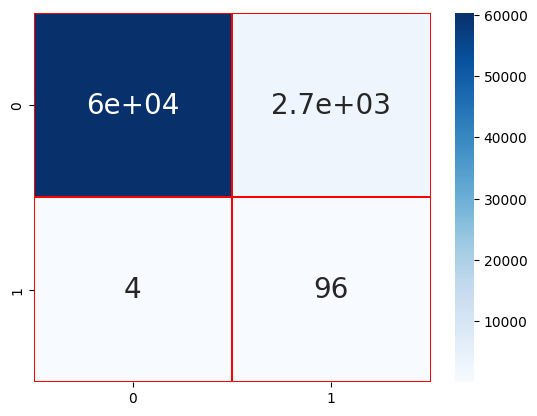

In [68]:
# classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#sklearn.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, text_fontsize='small', title_fontsize='medium', cmap='Blues');
print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,cmap='Blues',linewidths=0.3, linecolor='red',annot_kws={"size": 20})

